## Introduction
Predicting the resale value of used cars is a vital problem in the automotive marketplace. Accurate price estimation helps both buyers and sellers make informed decisions, reduces market inefficiencies, and enables platforms like CarDekho to offer fair pricing recommendations.

In this project, we aim to build a robust machine learning model that predicts the selling price of used cars based on various features such as:

Age of the car

Kilometers driven

Fuel type

Transmission type

Ownership history

Seller type

To achieve this, we performed comprehensive data preprocessing, feature engineering, exploratory data analysis (EDA), and applied supervised regression algorithms. Special attention was given to handling skewed distributions and categorical variables, and to evaluating model performance using standard metrics.

Our goal is not only to optimize predictive accuracy but also to understand the underlying factors influencing car prices, thereby offering a transparent and interpretable solution.



## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

## Basic Check

In [3]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### There are 4 categorical columns

In [7]:
# finding no of rows and Columns
print('Number of rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of rows 4340
Number of Columns 8


In [8]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
data.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


In [10]:
# Drop nsme Columns
data.drop('name',axis=1,inplace=True)

In [11]:
# finding null values
data.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [17]:
# Subtract Car age to Current age
data['car_age'] = 2025 - data['year']
data.drop('year', axis=1, inplace=True)  # Drop original year

In [18]:
# Instead of dropping km_driven, apply a log transformation to normalize the distribution:

import numpy as np

data['log_km_driven'] = np.log1p(data['km_driven'])  # log1p handles 0 safely


In [21]:
data.drop('km_driven', axis=1, inplace=True)

## EDA

In [26]:
data.describe()

,selling_price,car_age,log_km_driven
count,4.340000e+03,4340.000000,4340.000000
mean,5.041273e+05,11.909217,10.814991
std,5.785487e+05,4.215344,0.898449
min,2.000000e+04,5.000000,0.693147
25%,2.087498e+05,9.000000,10.463132
50%,3.500000e+05,11.000000,11.002117
75%,6.000000e+05,14.000000,11.407576
max,8.900000e+06,33.000000,13.600583


In [27]:
data.columns

Index(['selling_price', 'fuel', 'seller_type', 'transmission', 'owner',
       'car_age', 'log_km_driven'],
      dtype='object')

In [28]:
data1 = data[['car_age', 'log_km_driven','selling_price']]
data2 =data[['fuel', 'seller_type','transmission', 'owner']]

# Numerical data

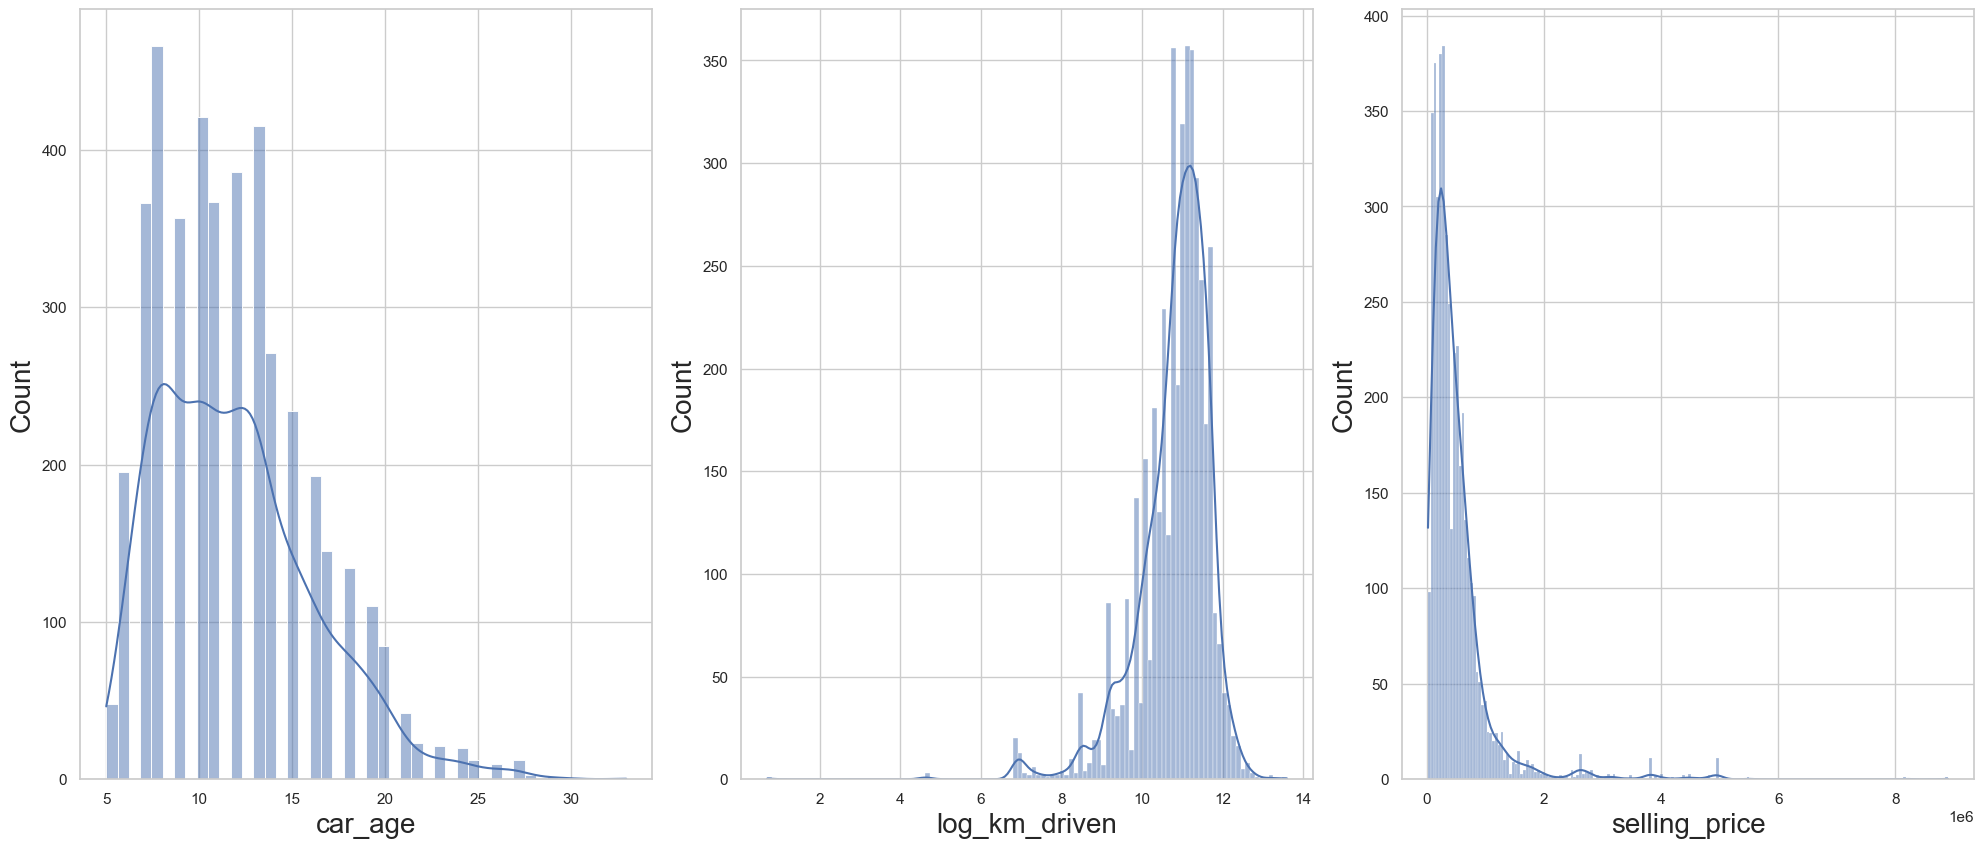

In [30]:
# Numerical data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 
for column in data1:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=data1[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Categorial Data

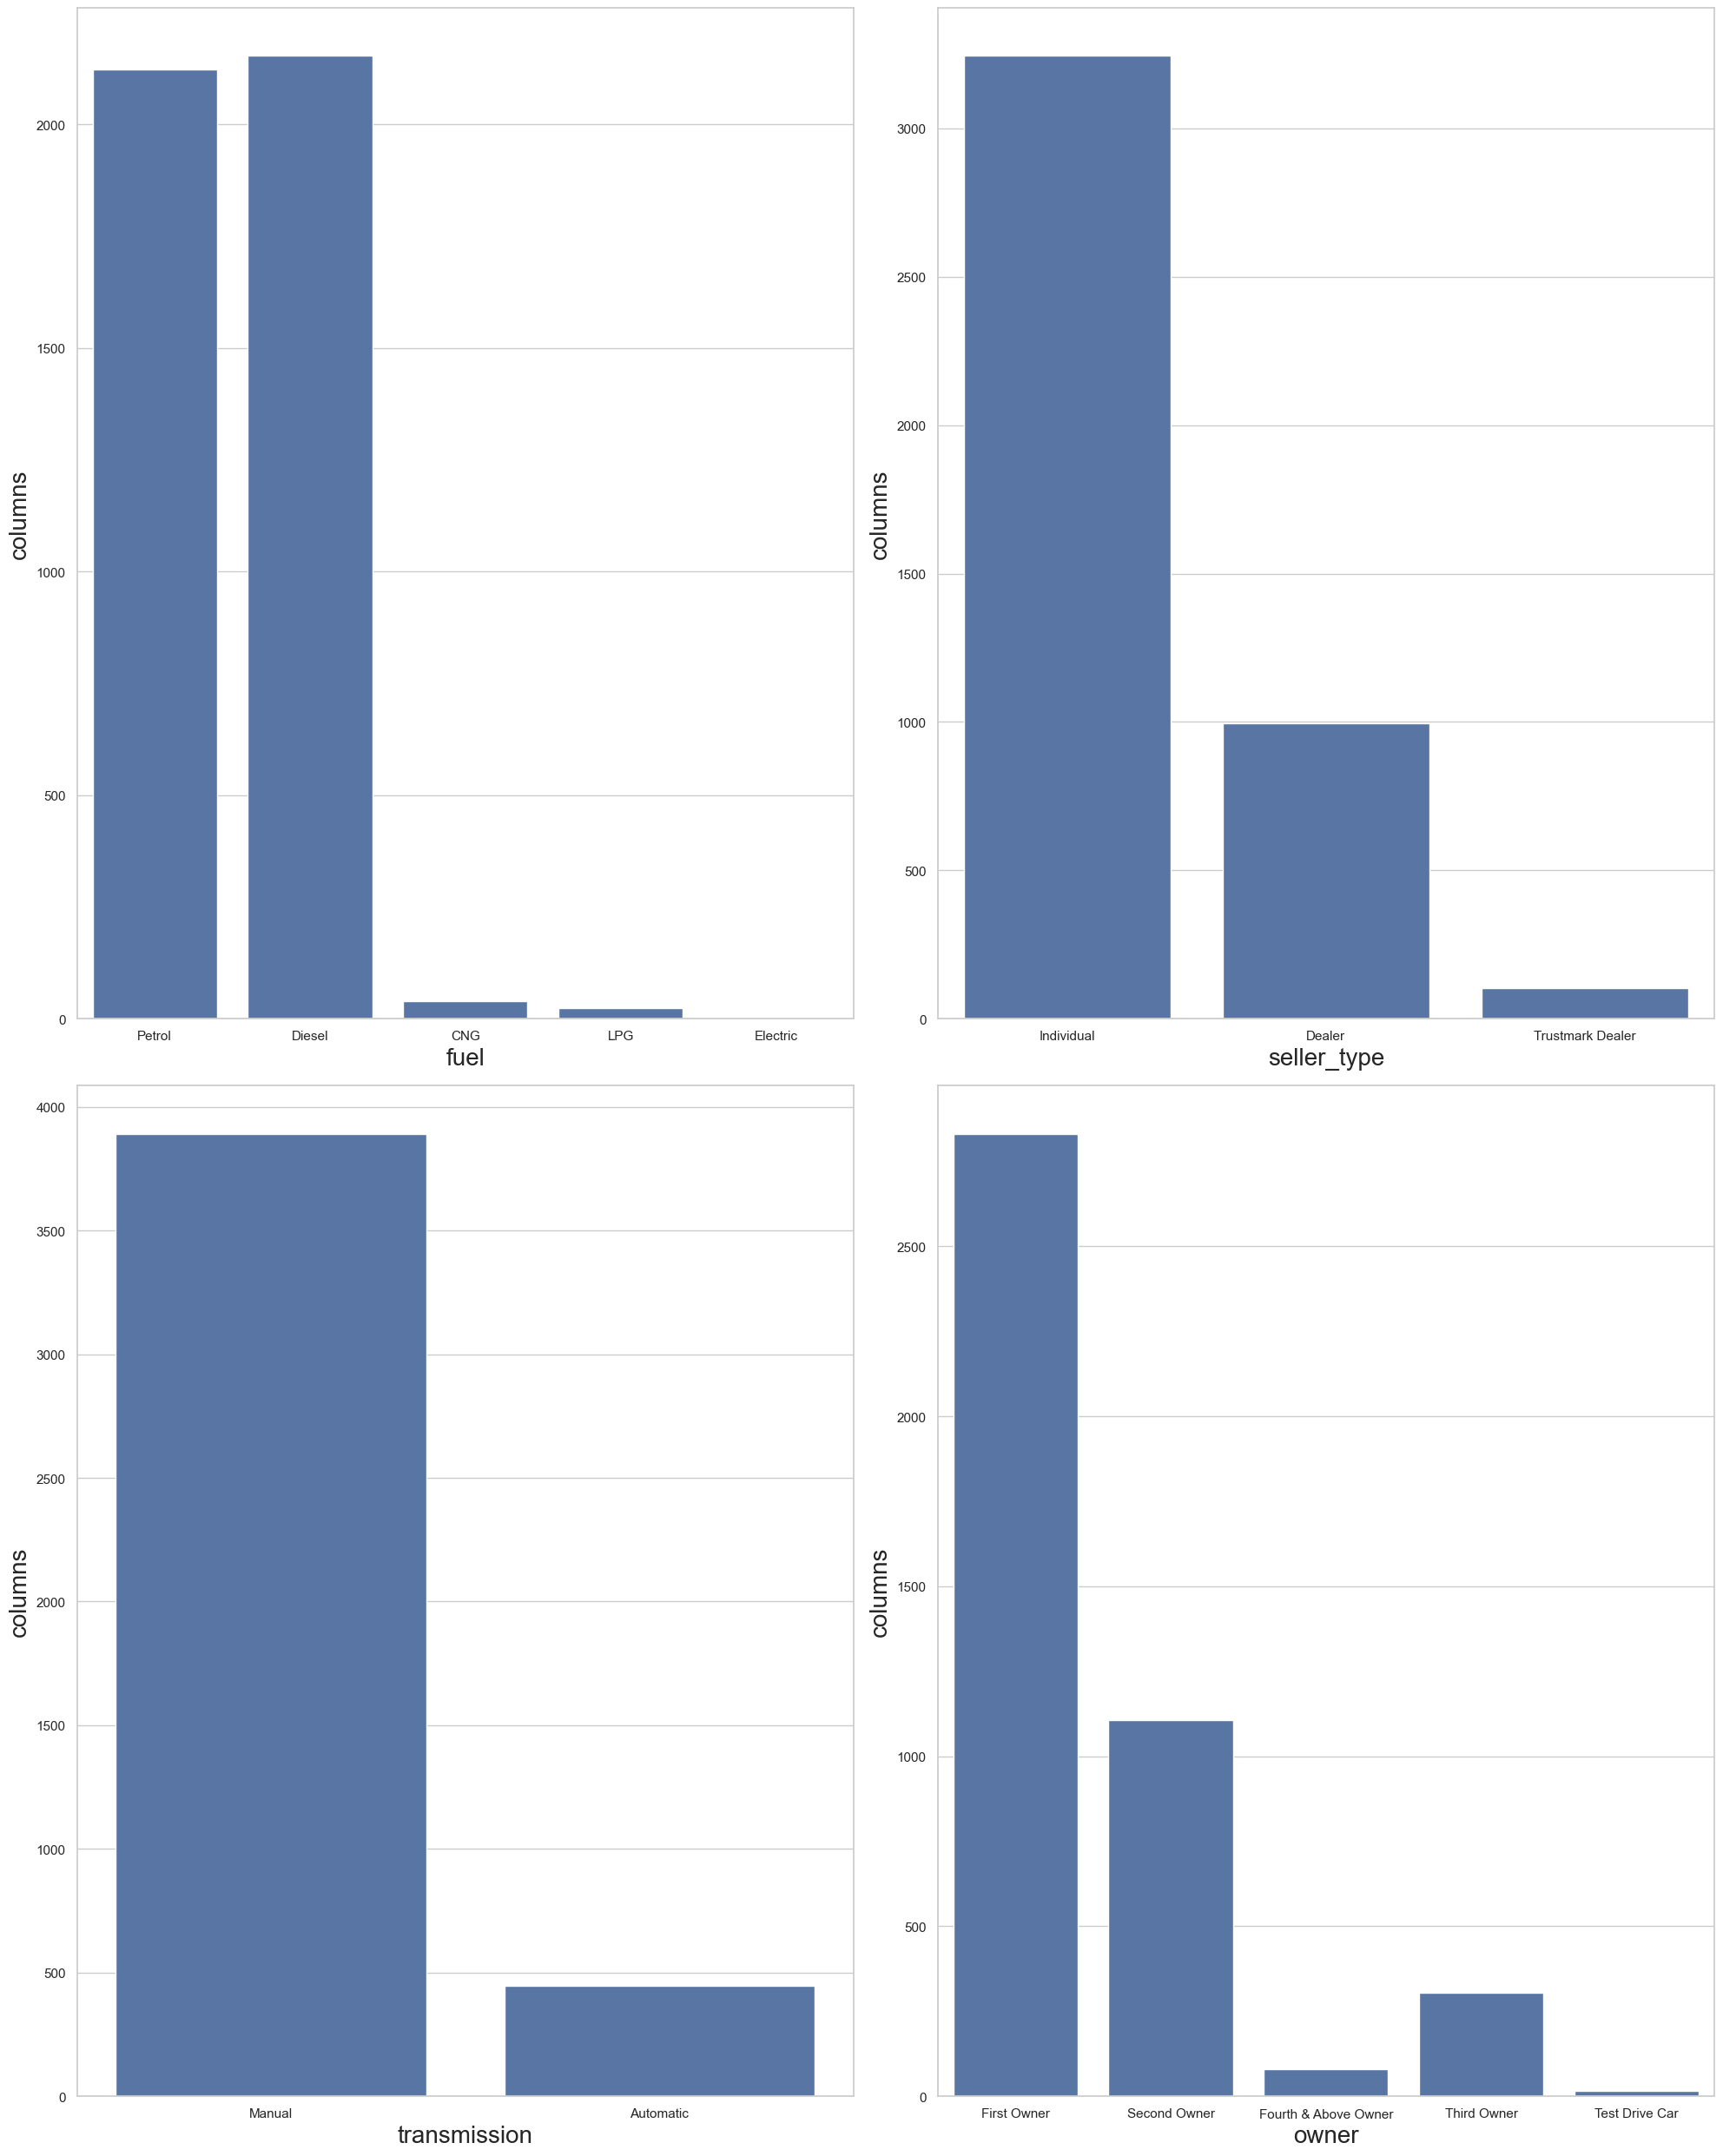

In [32]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size and background
plotnumber = 1  # Initialize subplot counter

for column in data2.columns:  # Iterate through each column of the DataFrame
    if plotnumber <= 10:
        ax = plt.subplot(2, 2, plotnumber)  # Create a subplot in a 3x2 grid
        sns.countplot(x=data2[column])  # Countplot with hue
        plt.xlabel(column, fontsize=20)  # Set x-axis label
        plt.ylabel('columns', fontsize=20)  # Set y-axis label
        plotnumber += 1  # Increment counter

plt.tight_layout()  # Prevent overlapping of plots
plt.show()  # Display the figure

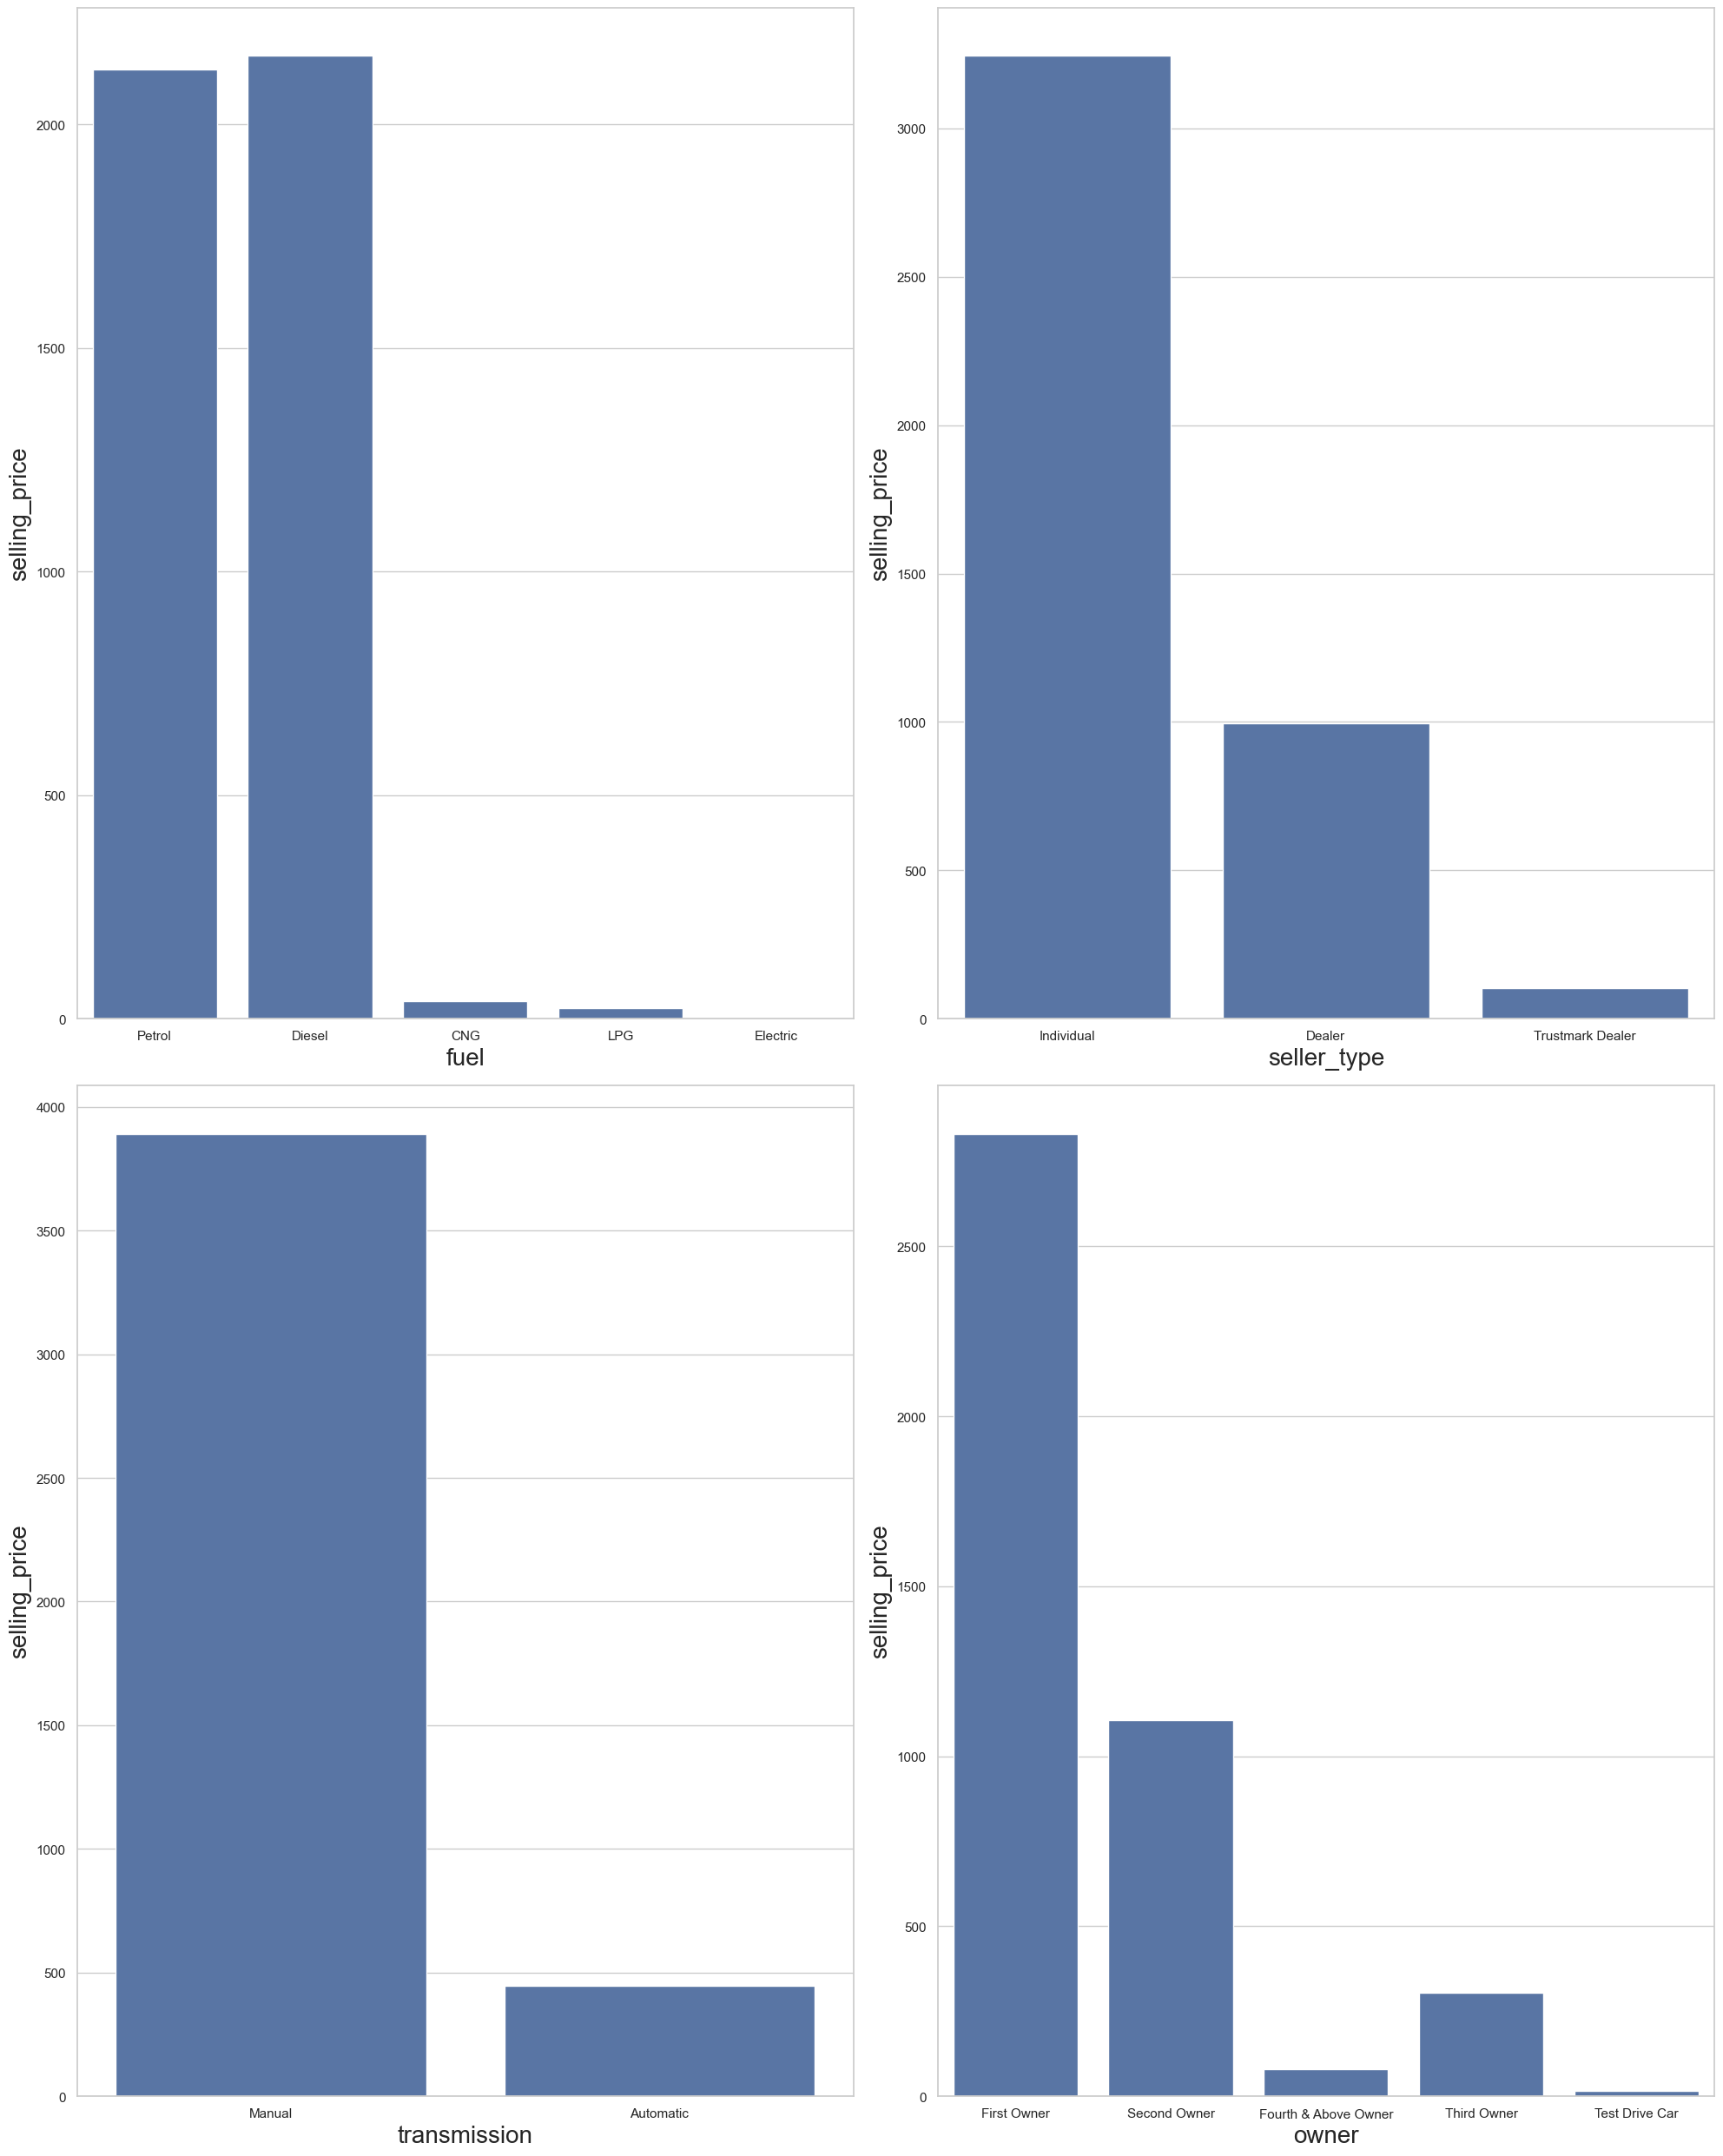

In [37]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set the canvas size and background
plotnumber = 1  # Initialize subplot counter

for column in data2.columns:  # Iterate through each column of the DataFrame
    if plotnumber <= 10:
        ax = plt.subplot(2, 2, plotnumber)  # Create a subplot in a 3x2 grid
        sns.countplot(x=data2[column], hue=data['selling_price'])  # Countplot with hue
        plt.xlabel(column, fontsize=20)  # Set x-axis label
        plt.ylabel('selling_price', fontsize=20)  # Set y-axis label
        plotnumber += 1  # Increment counter

plt.tight_layout()  # Prevent overlapping of plots
plt.show()  # Display the figure

# selling_price is a continuous variable, and hue in sns.countplot() expects a categorical variable.
# You can't use a continuous variable like selling_price as hue in countplot.

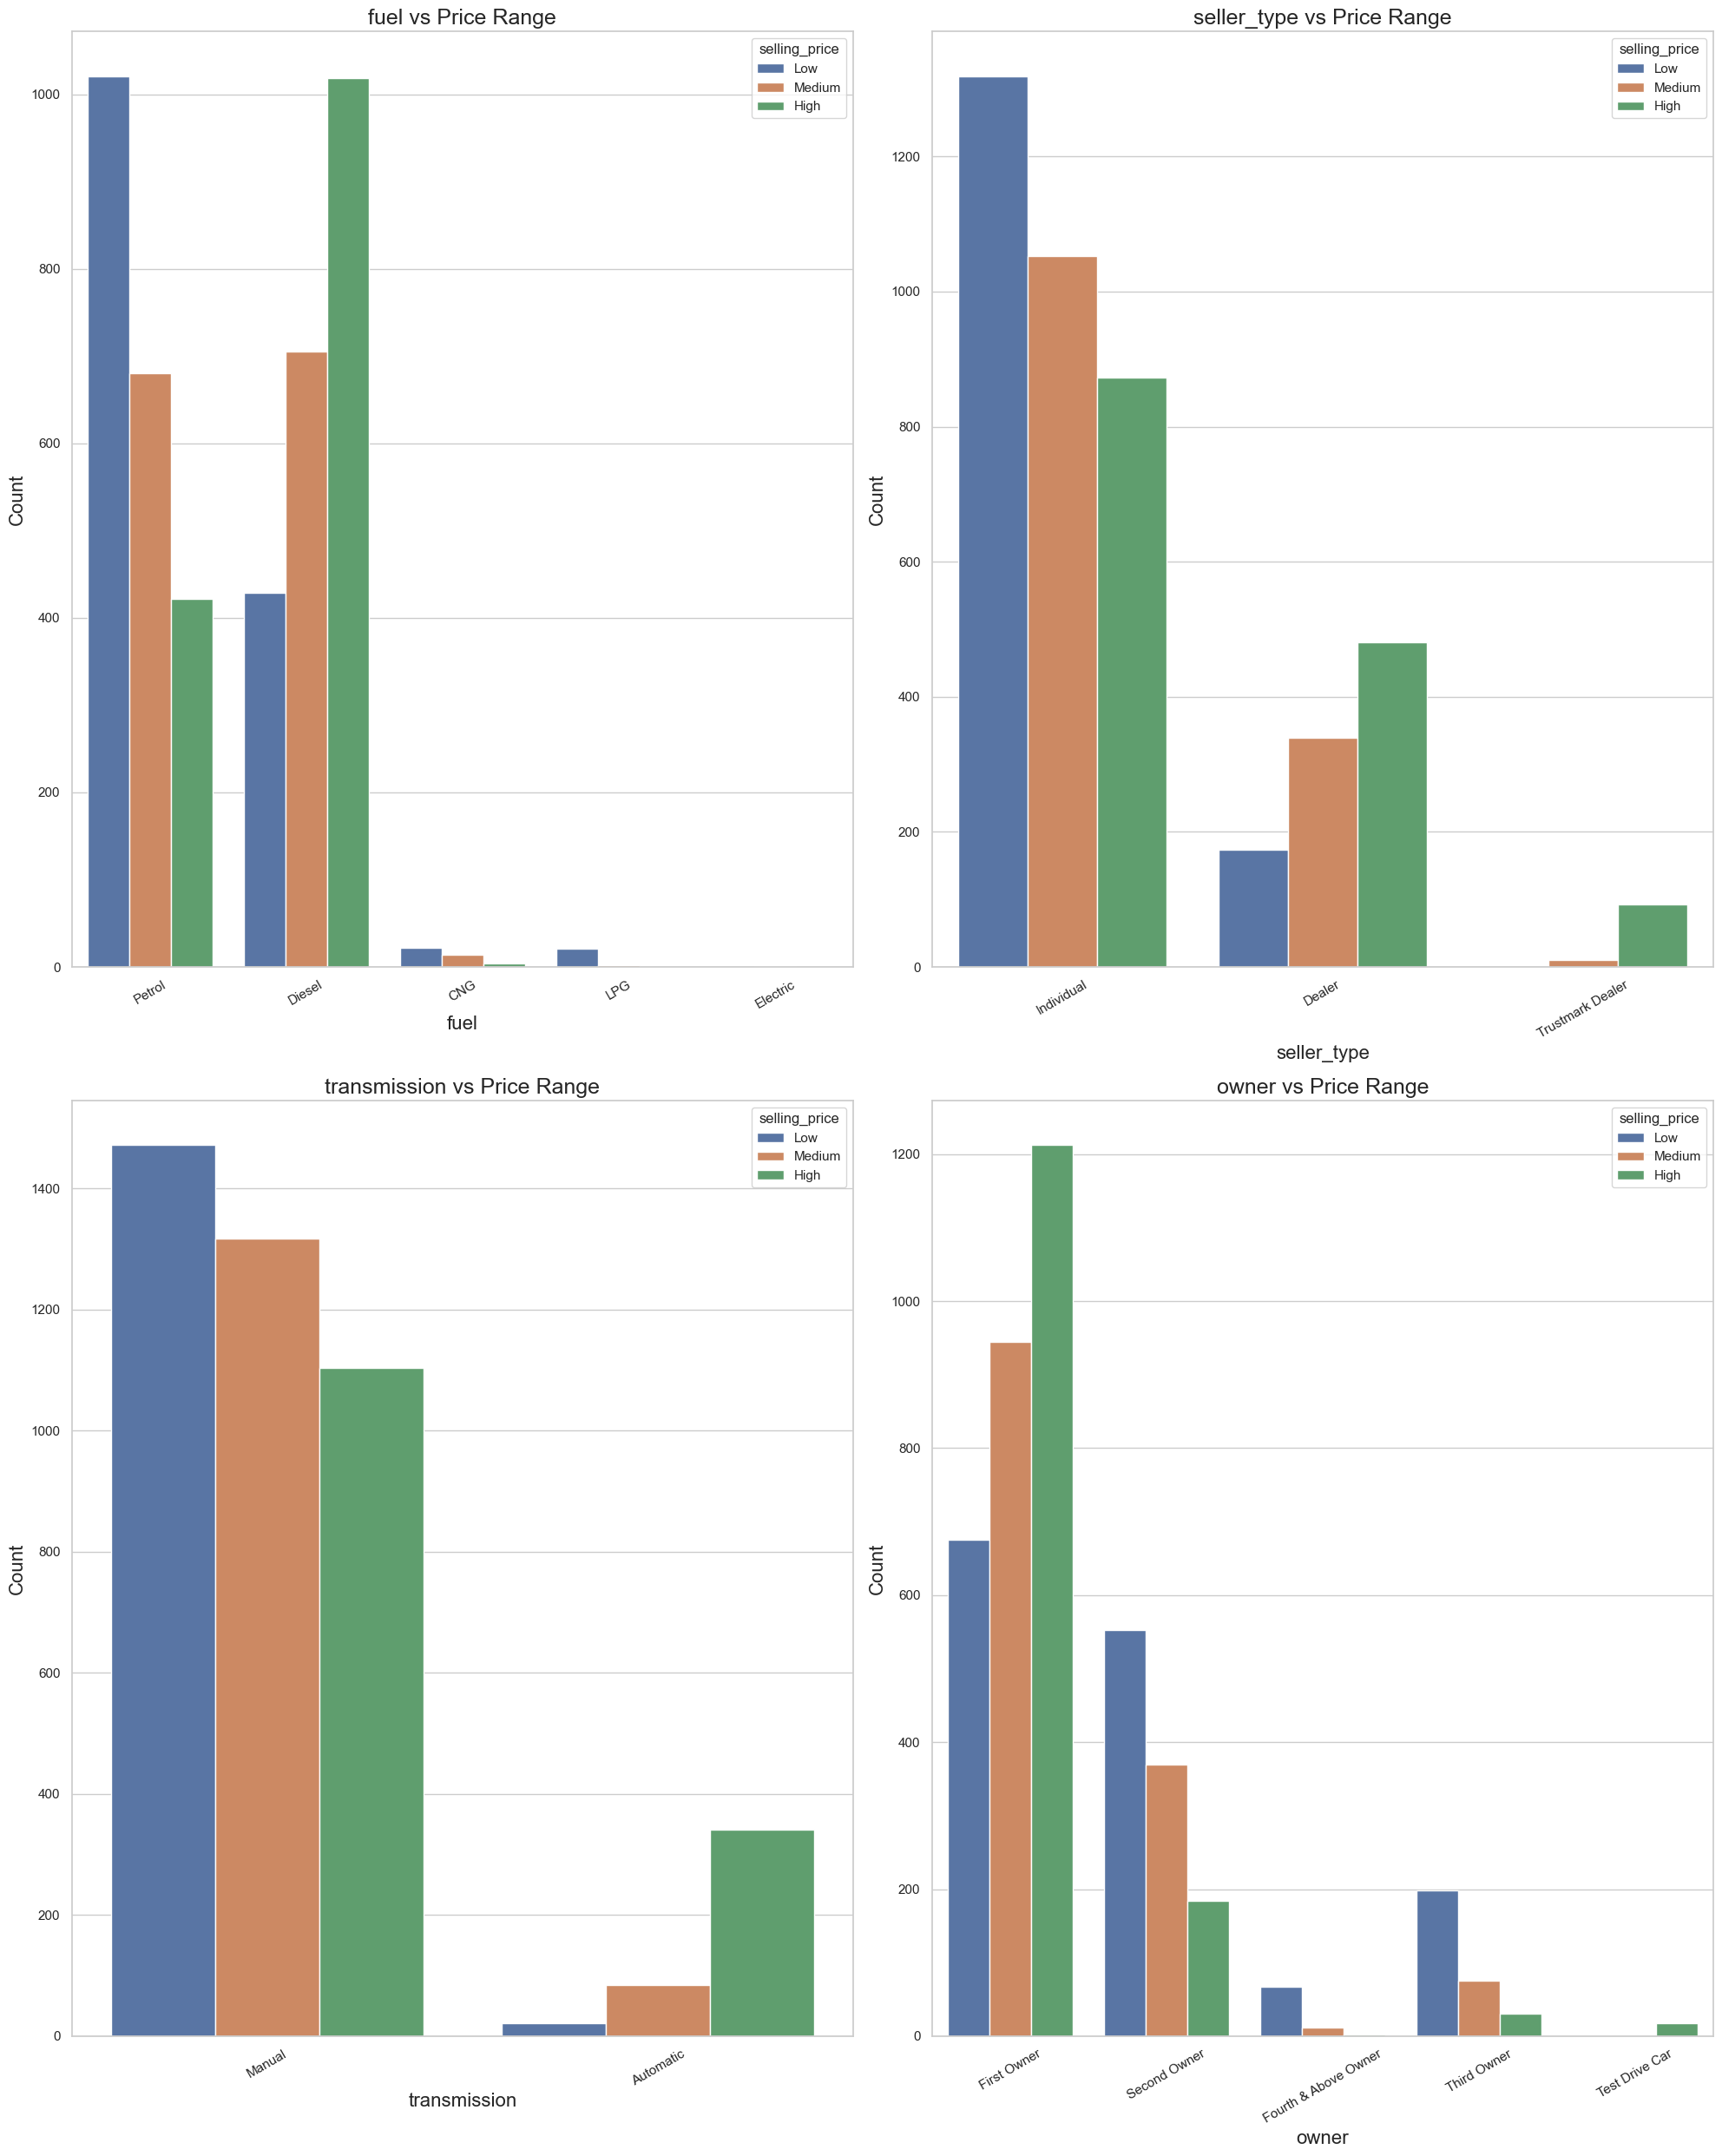

In [36]:

# Create price bins (e.g., Low, Medium, High)
import pandas as pd
price_bins = pd.qcut(data['selling_price'], q=3, labels=['Low', 'Medium', 'High'])

# Then use this as hue
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data2.columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.countplot(x=data2[column], hue=price_bins)
        plt.xlabel(column, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.title(f'{column} vs Price Range', fontsize=18)
        plt.xticks(rotation=30)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# Multivarient

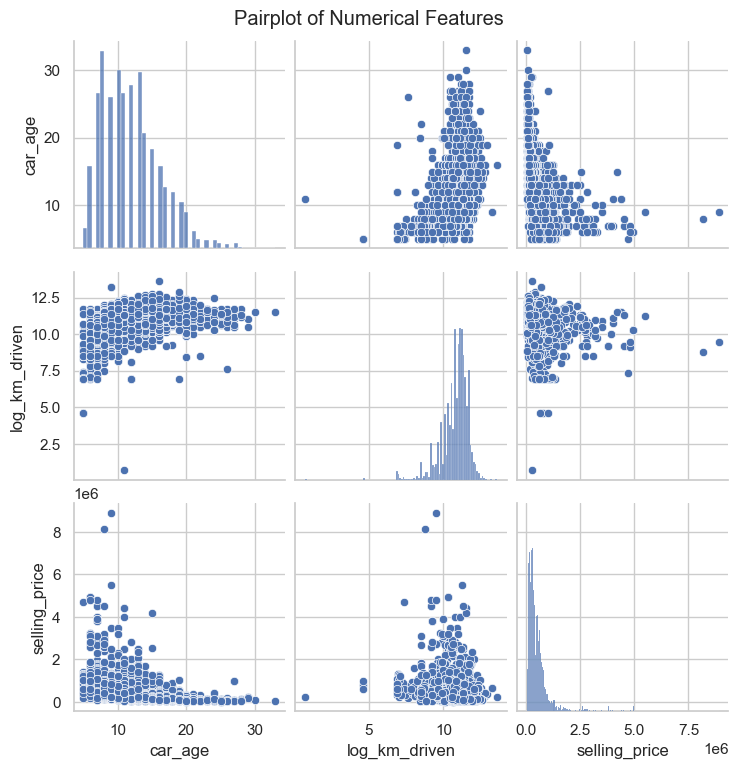

In [39]:
sns.pairplot(data1)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

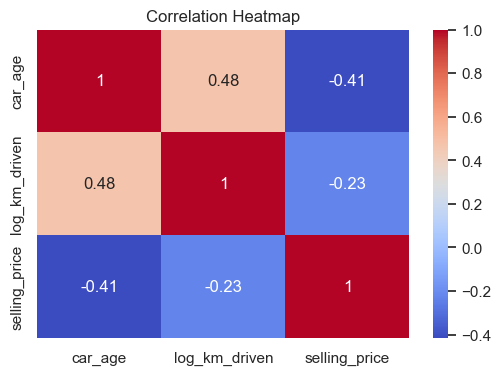

In [40]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Data Cleaning


In [41]:
data.isnull().sum()

selling_price    0
fuel             0
seller_type      0
transmission     0
owner            0
car_age          0
log_km_driven    0
dtype: int64

In [42]:
data.isnull().mean() * 100  # Percent missing

selling_price    0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
car_age          0.0
log_km_driven    0.0
dtype: float64

In [43]:
# There is no null value

In [44]:
# Check for duplicates
data.duplicated().sum()

#  Drop them
data.drop_duplicates(inplace=True)

# Finding & Handling Outliers

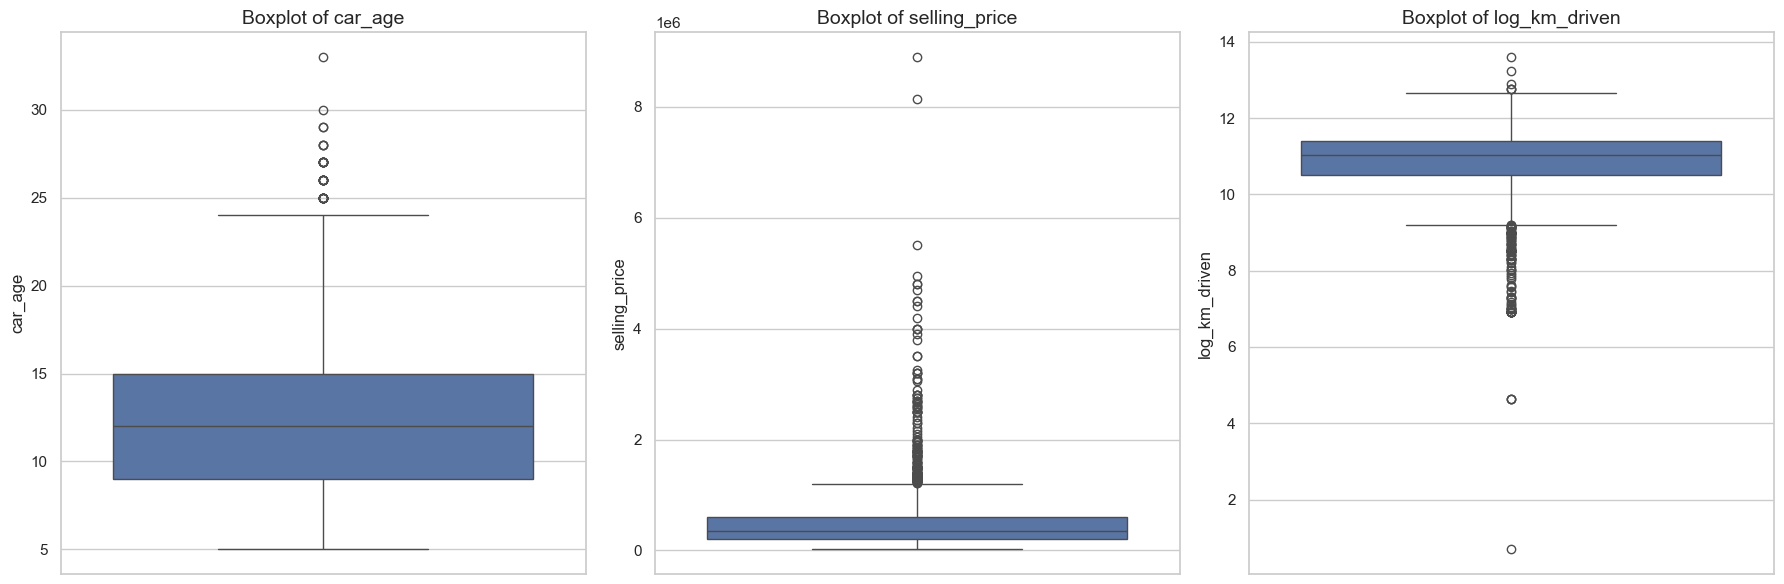

In [46]:
# Extract numeric columns
data1 = data[['car_age', 'selling_price', 'log_km_driven']]
numeric_columns = data1.columns

plt.figure(figsize=(18, 6), facecolor='white')
plotnumber = 1

for column in numeric_columns:
    ax = plt.subplot(1, 3, plotnumber)
    sns.boxplot(y=data[column], ax=ax)
    ax.set_title(f'Boxplot of {column}', fontsize=14)
    ax.set_ylabel(column)
    plotnumber += 1

plt.tight_layout()

Number of outliers in 'price': 37


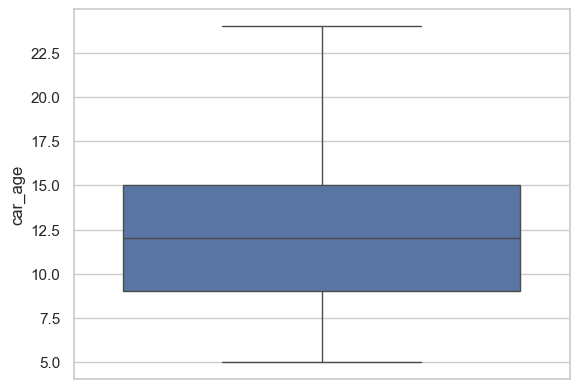

In [48]:
Q1 = data['car_age'].quantile(0.25)
Q3 = data['car_age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['car_age'] < lower_bound) | (data['car_age'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['car_age'] = data['car_age'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="car_age")
plt.show()

Number of outliers in 'price': 169


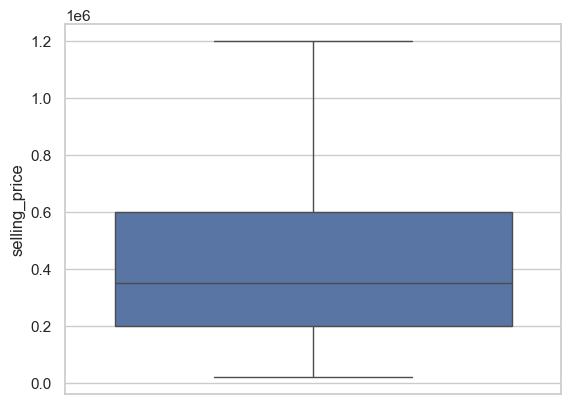

In [49]:
Q1 = data['selling_price'].quantile(0.25)
Q3 = data['selling_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['selling_price'] < lower_bound) | (data['selling_price'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['selling_price'] = data['selling_price'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="selling_price")
plt.show()

Number of outliers in 'price': 145


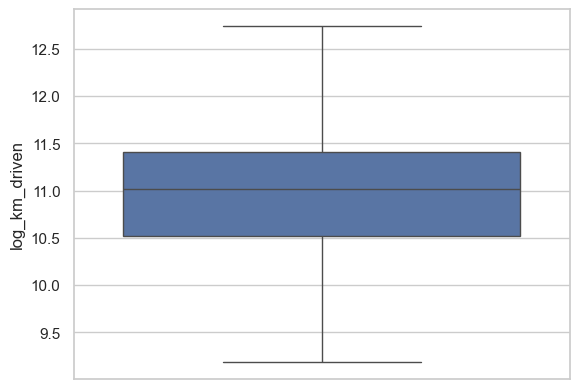

In [50]:
Q1 = data['log_km_driven'].quantile(0.25)
Q3 = data['log_km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['log_km_driven'] < lower_bound) | (data['log_km_driven'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['log_km_driven'] = data['log_km_driven'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="log_km_driven")
plt.show()

### Applying Encoding

In [51]:
data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
print(data)

      selling_price  car_age  log_km_driven  fuel_Diesel  fuel_Electric  \
0             60000       18      11.156265        False          False   
1            135000       18      10.819798        False          False   
2            600000       13      11.512935         True          False   
3            250000        8      10.736418        False          False   
4            450000       11      11.856522         True          False   
...             ...      ...            ...          ...            ...   
4334         600000       13      12.043560         True          False   
4335         409999       11      11.289794         True          False   
4337         110000       16      11.326608        False          False   
4338         865000        9      11.407576         True          False   
4339         225000        9      10.596660        False          False   

      fuel_LPG  fuel_Petrol  seller_type_Individual  \
0        False         True                 

In [52]:
data

,selling_price,car_age,log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,18,11.156265,False,False,False,True,True,False,True,False,False,False,False
1,135000,18,10.819798,False,False,False,True,True,False,True,False,False,False,False
2,600000,13,11.512935,True,False,False,False,True,False,True,False,False,False,False
3,250000,8,10.736418,False,False,False,True,True,False,True,False,False,False,False
4,450000,11,11.856522,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,600000,13,12.043560,True,False,False,False,True,False,True,False,False,False,False
4335,409999,11,11.289794,True,False,False,False,True,False,True,False,True,False,False
4337,110000,16,11.326608,False,False,False,True,True,False,True,False,True,False,False
4338,865000,9,11.407576,True,False,False,False,True,False,True,False,False,False,False


# Model Creation

In [53]:
X = data.drop(columns=['selling_price'])
y = data['selling_price']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train

,car_age,log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
175,18,11.512935,False,False,False,True,True,False,True,False,True,False,False
1148,7,10.165890,False,False,False,True,False,False,False,False,False,False,False
1939,22,10.463132,False,False,False,True,True,False,True,False,False,False,False
1150,9,10.043293,False,False,False,True,False,False,True,False,False,False,False
1387,9,10.126671,False,False,False,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,15,10.819798,False,False,False,True,True,False,True,False,False,False,False
1280,9,10.373522,False,False,False,True,False,False,False,False,False,False,False
1448,6,10.203629,False,False,False,True,True,False,True,False,False,False,False
983,15,11.608245,True,False,False,False,True,False,True,False,False,False,True


In [56]:
X_test

,car_age,log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1855,12,11.082158,True,False,False,False,True,False,True,False,False,False,False
2955,18,12.314932,True,False,False,False,True,False,True,True,False,False,False
2662,20,10.126671,False,False,False,True,True,False,True,False,True,False,False
2232,17,11.695255,False,False,False,True,True,False,True,False,True,False,False
325,6,10.308986,True,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,11,11.512935,True,False,False,False,True,False,True,False,True,False,False
825,10,11.407576,False,False,False,True,True,False,True,False,True,False,False
711,9,10.312081,True,False,False,False,False,False,False,False,False,False,False
1738,17,10.638832,False,False,False,True,True,False,True,False,True,False,False


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
# Step 2: Initialize and train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [64]:
print("🔍 Random Forest Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

🔍 Random Forest Performance:
MAE  : 144964.69
RMSE : 200027.62
R²   : 0.5766


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Log-transform target
y_log = np.log1p(data['selling_price'])

# 2. Train-test split
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42)

# 3. Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# 4. Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    verbose=2
)

grid_search.fit(X_train, y_train_log)

# 5. Use best estimator to predict
best_rf = grid_search.best_estimator_
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# 6. Evaluate
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("📊 Tuned Random Forest Performance:")
print(f"Best Params : {grid_search.best_params_}")
print(f"MAE         : {mae:.2f}")
print(f"RMSE        : {rmse:.2f}")
print(f"R²          : {r2:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
📊 Tuned Random Forest Performance:
Best Params : {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
MAE         : 130945.98
RMSE        : 187901.74
R²          : 0.6264


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Log-transform target
y_log = np.log1p(data['selling_price'])

# 2. Split data
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 3. Define XGBoost model and parameter grid
xgb = XGBRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train_log)

# 5. Predict and inverse transform
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test_log)

# 6. Evaluation
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("📊 Tuned XGBoost Performance:")
print(f"Best Parameters : {grid_search.best_params_}")
print(f"MAE             : {mae:.2f}")
print(f"RMSE            : {rmse:.2f}")
print(f"R²              : {r2:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
📊 Tuned XGBoost Performance:
Best Parameters : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
MAE             : 129156.10
RMSE            : 187414.80
R²              : 0.6284


## 📌 Conclusion
In this car price prediction project, we explored various data preprocessing, feature engineering, and modeling strategies using the dataset from CarDekho.

✅ Key Steps Taken:
Extracted and transformed relevant features such as:

car_age (from year)

Log-transformed km_driven to reduce skew

Dropped less informative columns like name

One-hot encoded categorical variables: fuel, seller_type, transmission, and owner

Applied log transformation to the target variable selling_price to handle skewed distributions and reduce outlier impact

🔍 Modeling & Results:
Tried multiple algorithms, with special focus on Random Forest and XGBoost

Tuned both models using GridSearchCV with cross-validation

Best performing model: XGBoost Regressor with the following metrics:

Metric	Value
MAE	₹129,156.10
RMSE	₹187,414.80
R² Score	0.6284
